In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

Şimdi, ilk regresyon modelinizi tasarlama sırası sizde. Bu bölümde, Kaggle'ın "Ev Fiyatları" veri kümesini kullanacaksınız. Bu veri kümesi, Ames/Iowa'da ki konutların birçok yönünü açıklayan 79 değişkenden oluşmaktadır. Göreviniz bu verileri kullanarak, evlerin fiyatlarını tahmin etmek olacak. Verileri ve değişkenlerin açıklamalarını burada bulabilirsiniz: Ev Fiyatları

***Verileri inceleyin ve gerekli tüm verileri temizleyin.**

***Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.**

***Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.**

In [2]:
house_Prices = pd.read_csv("data/train.csv")

In [3]:
house_Prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
toplam = house_Prices.isnull().sum()

yuzde = (house_Prices.isnull().sum()/house_Prices.isnull().count())

In [6]:
Null_degerler = pd.concat([toplam, yuzde], axis=1, keys = ['toplam', 'yuzde'])


In [7]:
Null_degerler.toplam.sort_values(ascending= False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
Name: toplam, dtype: int64

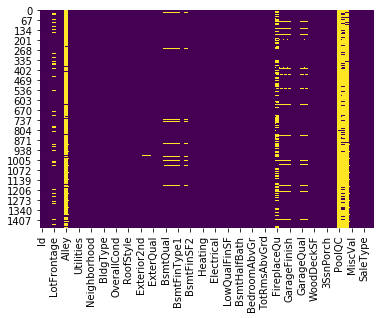

In [8]:
sns.heatmap(house_Prices.isnull(), cbar= False, cmap='viridis')

In [9]:
Bos_ham_hucre_toplami = house_Prices.isnull().sum()*100/len(house_Prices)
Bos_ham_hucre_toplami.head()

Id              0.000000
MSSubClass      0.000000
MSZoning        0.000000
LotFrontage    17.739726
LotArea         0.000000
dtype: float64

In [10]:
Kolon_Listesi = list(Bos_ham_hucre_toplami.sort_values(ascending=False).index[0:11])

In [11]:
print(Kolon_Listesi)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual']


In [12]:
for column in Kolon_Listesi:
    print(column)
    print(house_Prices[column].nunique())
    print(house_Prices[column].dtype)
    print('-'*98)

PoolQC
3
object
--------------------------------------------------------------------------------------------------
MiscFeature
4
object
--------------------------------------------------------------------------------------------------
Alley
2
object
--------------------------------------------------------------------------------------------------
Fence
4
object
--------------------------------------------------------------------------------------------------
FireplaceQu
5
object
--------------------------------------------------------------------------------------------------
LotFrontage
110
float64
--------------------------------------------------------------------------------------------------
GarageCond
5
object
--------------------------------------------------------------------------------------------------
GarageType
6
object
--------------------------------------------------------------------------------------------------
GarageYrBlt
97
float64
---------------------------------

In [13]:
#fOR FURTHER INFO OF THE COLUMNS 

for column in Kolon_Listesi:
    print(house_Prices[column].value_counts().head())
    print('-'*98)

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
--------------------------------------------------------------------------------------------------
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
--------------------------------------------------------------------------------------------------
Grvl    50
Pave    41
Name: Alley, dtype: int64
--------------------------------------------------------------------------------------------------
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
--------------------------------------------------------------------------------------------------
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
--------------------------------------------------------------------------------------------------
60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: LotFrontage, dtype: int64
------------------------------------------------------------------------------

In [14]:
house_Prices_filled = house_Prices.copy()

In [15]:
sutunlar = house_Prices_filled.columns
sutunlar

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
fill_list_int = ['LotFrontage', 'MasVnrArea',  'GarageYrBlt'] 

In [17]:
for col in fill_list_int:
    house_Prices_filled.loc[:,col].interpolate(inplace=True)

In [18]:
enterpolate_snrsi__hucre_toplami = house_Prices_filled[['LotFrontage','MasVnrArea','GarageYrBlt']].isnull().sum()*100/len(house_Prices)
enterpolate_snrsi__hucre_toplami


LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

Alley, MiscFeature and PoolQC have high number of missing values so I decided to ignore these coloumns

In [19]:
#Kategorik degiskenlerin doldurulmasi
fill_list_str = ['MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish',
                 'GarageQual','GarageCond', 'Fence']

In [20]:
house_Prices_filled['MasVnrType'].fillna(house_Prices_filled['MasVnrType'].mode(),inplace=True)
house_Prices_filled['FireplaceQu'].fillna(house_Prices_filled['FireplaceQu'].mode(),inplace=True)
house_Prices_filled['GarageType'].fillna(house_Prices_filled['GarageType'].mode(),inplace=True)
house_Prices_filled['GarageFinish'].fillna(house_Prices_filled['GarageFinish'].mode(),inplace=True)
house_Prices_filled['GarageQual'].fillna(house_Prices_filled['GarageQual'].mode(),inplace=True)
house_Prices_filled['GarageCond'].fillna(house_Prices_filled['GarageCond'].mode(),inplace=True)
house_Prices_filled['Fence'].fillna(house_Prices_filled['Fence'].mode(),inplace=True)

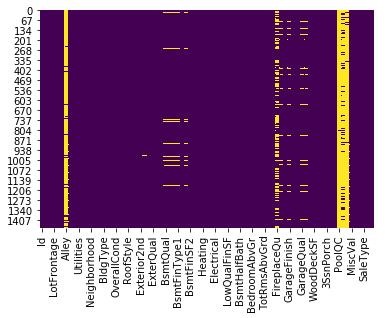

In [21]:
sns.heatmap(house_Prices_filled.isnull(),cbar= False, cmap='viridis' )

In [22]:
house_Prices_droppped =  house_Prices_filled.drop(['Alley','MiscFeature', 'PoolQC'], axis =1 )

In [23]:
house_Prices_filled.shape

(1460, 81)

In [24]:
house_Prices_droppped.shape

(1460, 78)

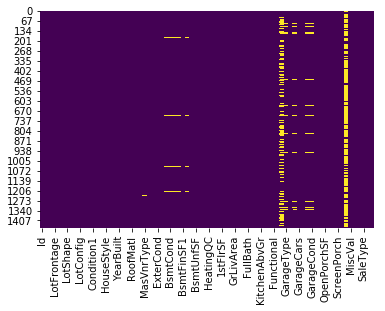

In [25]:
sns.heatmap(house_Prices_droppped.isnull(),cbar= False, cmap='viridis' )

In [26]:
#Kategorik degiskenlerin doldurulmasi alternatif yontem 
fill_list_stri = house_Prices_filled.Alley

for i in range(0, len(fill_list_str)):
    if pd.isnull(fill_list_str[i]):
        fill_list_str[i] = fill_list_str[i-1]

In [27]:
corr_matrix = house_Prices_droppped.corr()
corr_matrix.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.008822,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051443,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.352140,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023033,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.008822,-0.352140,1.000000,0.277992,0.222694,-0.049787,0.110838,0.074961,0.164402,0.199707,...,0.066568,0.117151,-0.005254,0.053770,0.038218,0.162123,-0.012081,0.013952,0.009590,0.310673
LotArea,-0.033226,-0.139781,0.277992,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103910,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.222694,0.105806,1.000000,-0.091932,0.572323,0.550684,0.408650,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


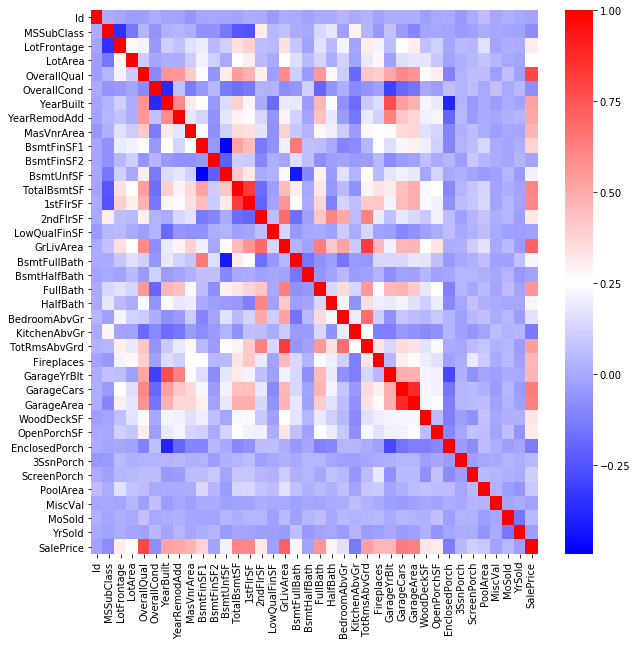

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap = 'bwr', linecolor='black')

In [29]:
 print(corr_matrix.SalePrice.sort_values(ascending=False)[1:11])


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [30]:
Y = house_Prices_droppped['SalePrice']

X = house_Prices_droppped[['YearBuilt', 'TotRmsAbvGrd', 'FullBath' , '1stFlrSF', 'TotalBsmtSF',
            'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'YearRemodAdd']]

In [31]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 2.68240707e+02  3.31050771e+01 -6.79087146e+03  1.41737355e+01
  1.98650991e+01  1.49475334e+01  1.04179010e+04  5.12971178e+01
  1.96045898e+04  2.96481161e+02]
Sabit değer (bias): 
 -1186193.7666661674


In [33]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:43:28   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187      0.000   -1.44e+06   -9.33e+05
YearBuilt      268.2407     50.346      5.328      0.000     169.481     367.000
TotRmsAbvGrd    33.1051   1119.061      0.030      0.976   -2162.048    2228.258
FullBath     -6790.8715   2682.369     -2.532      0.011   -1.21e+04   -1529.130
1stFlrSF        14.1737      4.930      2.875      0.004       4.504      23.844
TotalBsmtSF     19.8651      4.295      4.625      0.000      11.439      28.291
GarageArea      14.9475     10.311      1.450      0.147      -5.279      35.174
GarageCars    1.042e+04   3044.272      3.422      0.001    4446.249    1.64e+04
GrLivArea       51.2971      4.233     12.119      0.000      42.994      59.600
OverallQual    1.96e+04   1190.159     16.472      0.000    1.73e+04    2.19e+04
YearRemodAdd   296.4812     63.635      4.659      0.000     171.655     421.307
==============================================================================
Omnibus:                      477.814   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58906.279
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                      34.107   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""